In [1]:
from arthurai import ArthurAI

   This notebook shows a few examples of data visualization convenience methods that are available with ArthurModels. While many flexible queries are available to fetch data from the Arthur platform (see the [Query Guide](./QueryGuide.ipynb)), a few commonly-repeated tasks have been simplified. 

In [6]:
arthur_model = ArthurAI().get_model("f0eeb2b5-bca1-4a5a-b68f-68d4e6985350")

As a first example, we can quickly examine our favorite model evaluation metrics over time and determine if our model is degrading in any way. The **metric_series()** method takes in a list of metric names, and optionally a time resolution parameter (hour, day, batch).

In the case below, we notice a slight degradation in our model's performance as indicated by a gradual increase in false positives.

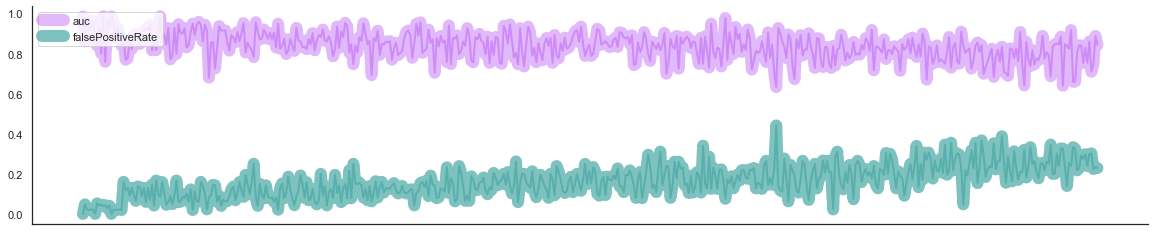

In [20]:
arthur_model.viz.metric_series(["auc", "falsePositiveRate"], time_resolution="hour")

In addition to model outcome metrics, we can also look at data drift metrics using the **drift_series()** method. Similarly, we provide a list of the name of our model attributes that we want to look at. We can also provide the name of a drift metric (PSI, KLDivergence, JSDivergence, HellingerDistance, HypothesisTest).

In the case below, we can quickly see that the attribute AGE is rather stable with consistently low KLDivergence scores, whereas the attribute PAY_0 experiences sudden and sustained drift.

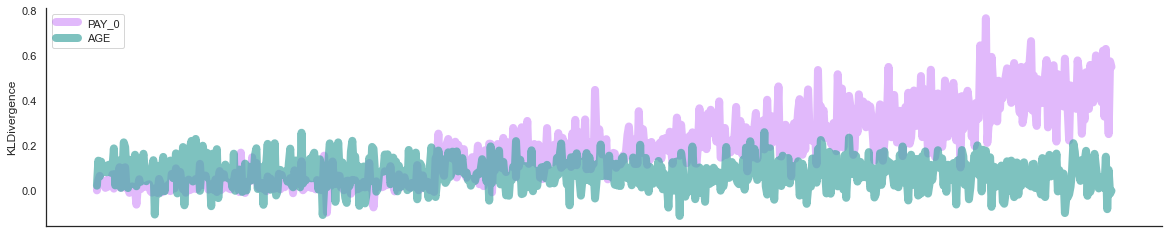

In [23]:
arthur_model.viz.drift_series(["PAY_0", "AGE"], drift_metric="KLDivergence", time_resolution="hour")

Calculating data drift metrics is not limited to only the input attributes of a model. We can calculate data drift for any attributes that we've included in the reference set. Of particular interest would be monitoring the stability of the model's output predictions. By looking at the prediction attributes, we can see a clear increase in drift, meaning that our model's typical distribution of predictions is quite different than we expect.

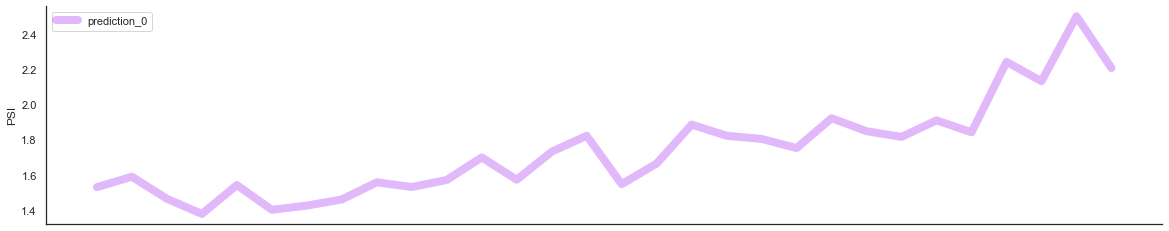

In [24]:
arthur_model.viz.drift_series(["prediction_0"], drift_metric="PSI")

In addition to metric time series, a common workflow is to quickly examine a particular attribute and visualize the distribution of that attribute over time. The **timeline()** method provides this view and takes in the name of any single attribute.

For continuous variables, we see a visualization of probability densities over time (from left to right). In the case of the variable AGE, these distributions look similar and stable, so this visual checks just confirms what we quantified above with our datadrift metrics.

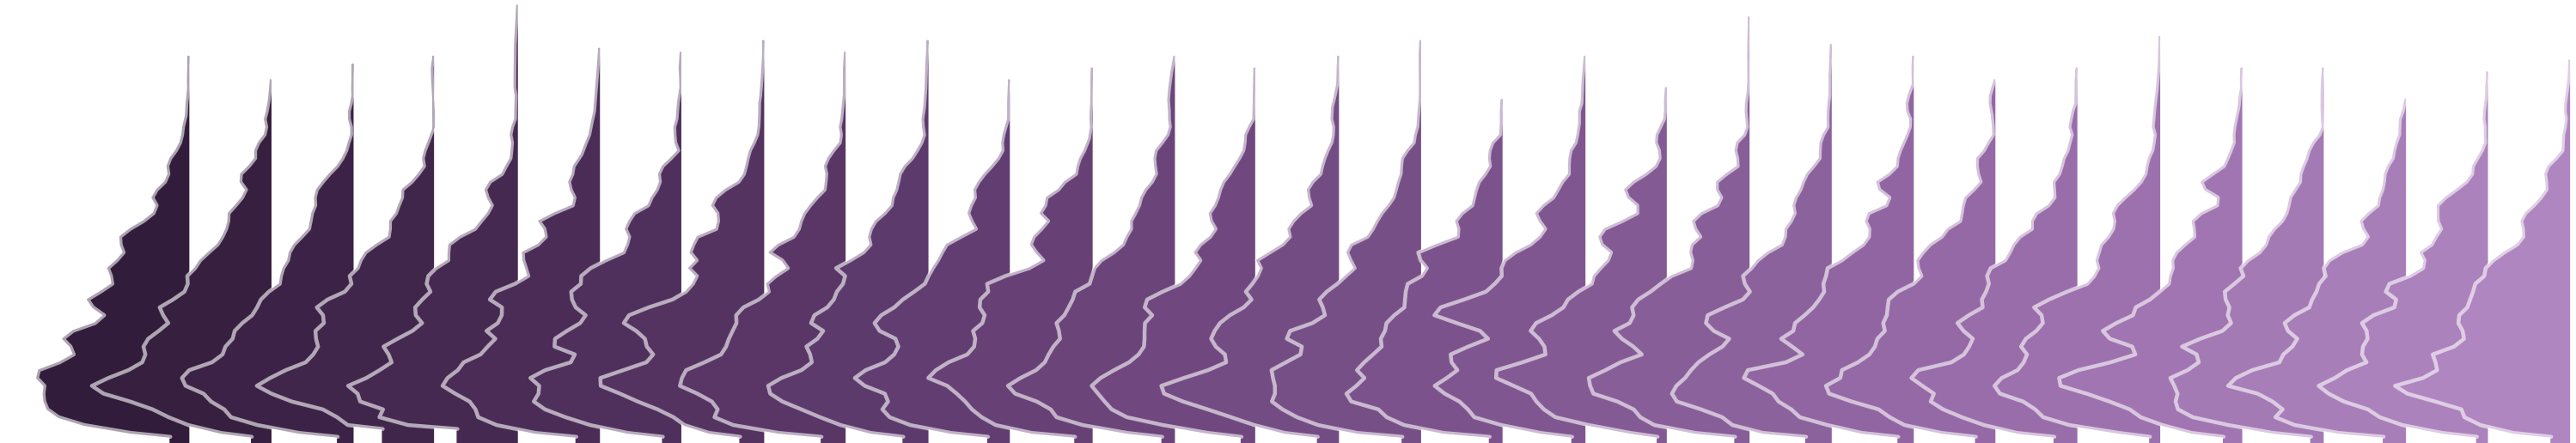

In [22]:
arthur_model.viz.timeline("AGE")

This is also no limited to model inputs, we can take a direct look at the distribution of a model's outputs day over day. In this case, we notice that this distribution moves a bit toward to the end of the timeframe, with a more prominent right tail emerging. 

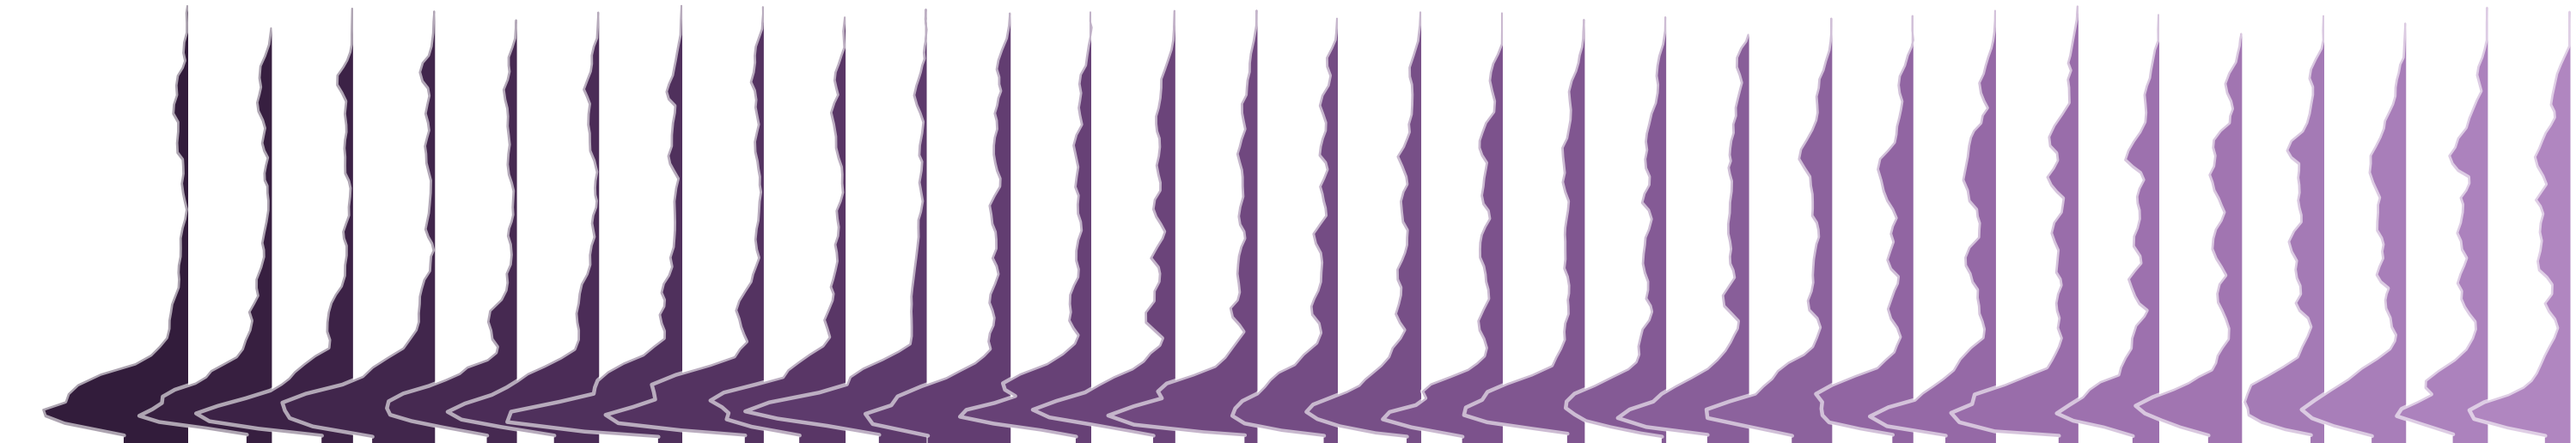

In [26]:
arthur_model.viz.timeline("prediction_1")

For categorical variables, we'll see a stacked area chart showing the counts (or proportion) of each category over time. In the case of EDUCATION, this variable has 7 possible categories and we see that the distribution over those categorgies is quite stable.

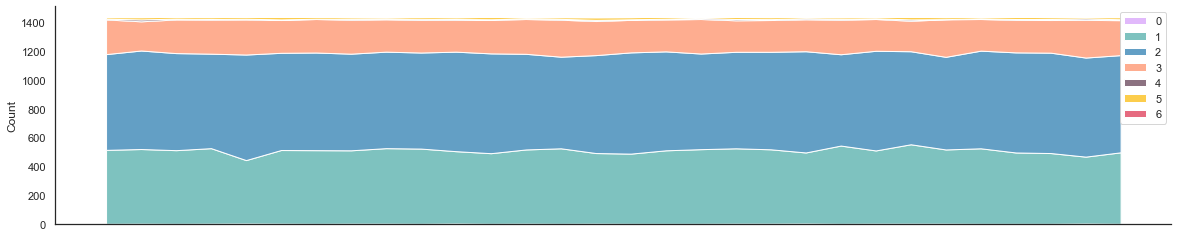

In [8]:
arthur_model.viz.timeline("EDUCATION")

In contrast, this PAY_0 variable has a notable change in its distribution, with a sudden emergence of new categories that were previously unseen. 

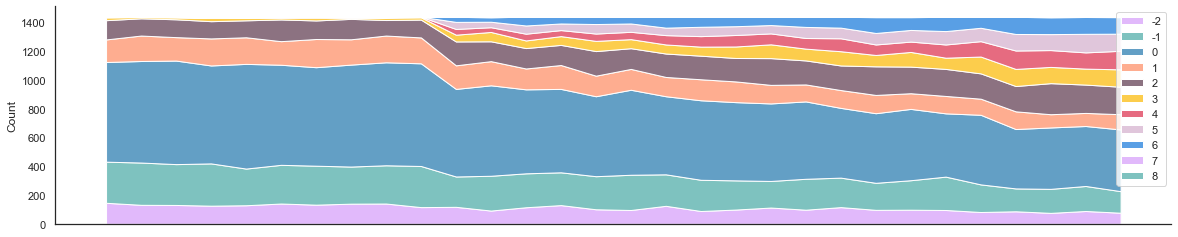

In [7]:
arthur_model.viz.timeline("PAY_0")